In [10]:
import pandas as pd
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

In [11]:
columnNames = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship'
               ,'race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

num, text = 0, 1
dataType = [num, text, num, text, num, text, text, text, text, text, num, num, num, text]

df = pd.read_csv("../dataset/adult.data", names= columnNames, sep=',')
df = df.replace(' ?', np.nan)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
for idx, dType in enumerate(dataType):
    if df[columnNames[idx]].isnull().sum().sum() != 0:
        if dType == text:
            df[columnNames[idx]].fillna(df[columnNames[idx]].mode()[0].strip(), inplace=True)
        else:
            df[columnNames[idx]].fillna(df[columnNames[idx]].mean(), inplace=True)

### Use df['columnName'] to extract the column.

In [45]:
# NATESH TYAGI
# Using 'native-country' parameter to predict the income

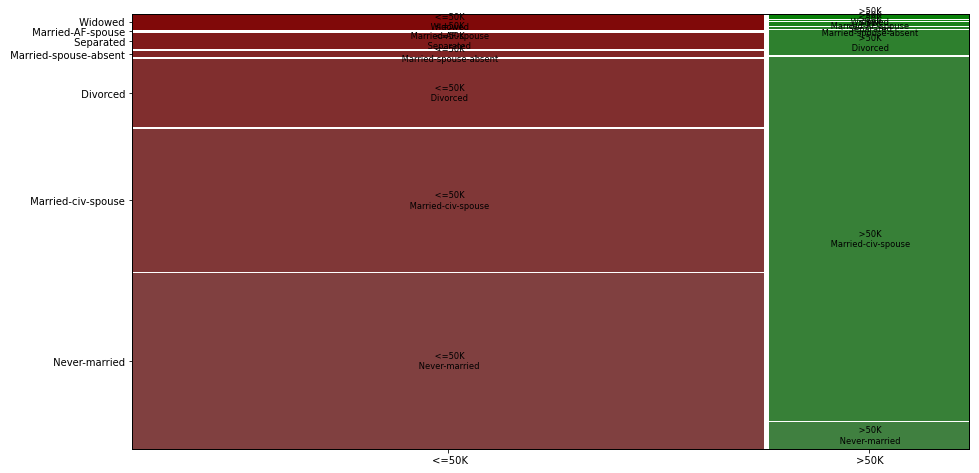

In [35]:
#KARTIK PAIGWAR
#Relation between Martial Status and Salary using Mosiac Plot
plt.close()
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,8))
mosaic(df, ['income','marital-status' ], ax=axes, axes_label=True)
plt.show()